In [ ]:
# 지금 2.8.0 버전에서는 이 데이터 셋으로 수행하면 에러 남
! pip install keras==2.3.1
! pip install tensorflow==2.2.0

     |████████████████████████████████| 377 kB 18.6 MB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.3.1 which is incompatible.
     |████████████████████████████████| 516.2 MB 4.1 kB/s 
     |████████████████████████████████| 3.0 MB 46.0 MB/s 
     |████████████████████████████████| 454 kB 61.8 MB/s 
     |████████████████████████████████| 2.9 MB 33.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimato

In [ ]:
from keras.utils.np_utils import to_categorical
from keras import models, layers
import tensorflow as tf, keras

Using TensorFlow backend.


In [ ]:
tf.__version__

'2.2.0'

In [ ]:
import os, shutil
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


- 과대적합 여부 확인
- 데이터 증식을 통한 네트워크의 성능 개선
- 사전 훈련된 네트워크 활용

## 작은 데이터셋 문제에서 딥러닝의 타당성

딥러닝은 데이터가 풍부할 때만 작동한다는 말을 이따금 듣습니다. 부분적으로는 맞습니다. 딥러닝의 근본적인 특징은 훈련 데이터에서 특성 공학의 수작업 없이 흥미로운 특성을 찾을 수 있는 것입니다. 이는 훈련 샘플이 많아야만 가능합니다. 입력 샘플이 이미지와 같이 매우 고차원인 문제에서는 특히 그렇습니다.

- 많은 샘플이 의미하는 것은 상대적
- 복잡한 문제를 푸는 컨브넷을 수십 개의 샘플만을 사용해서 훈련하는 것은 불가능
- 컨브넷은 지역적이고 평행 이동으로 변하지 않는 특성을 학습하기 때문에 지각에 관한 문제에서 매우 효율적으로 데이터를 사용
- 매우 작은 이미지 데이터셋에서 어떤 종류의 특성 공학을 사용하지 않고 컨브넷을 처음부터 훈련해도 납득할 만한 결과를 만들 수 있다(사전 훈련된 모델을 활용했을 때)

- 딥러닝 모델은 태생적으로 매우 다목적
- 대규모 데이터셋에서 훈련시킨 이미지 분류 모델이나 스피치-투-텍스트 모델을 조금만 변경해서 완전히 다른 문제에 재사용
- 특히 컴퓨터 비전에서는 (보통 ImageNet 데이터셋에서 훈련된) 사전 훈련된 모델들이 다운로드받을 수 있도록 많이 공개되어 있어서 매우 적은 데이터에서 강력한 비전 모델을 만드는 데 사용할 수 있다.

In [ ]:
base = '/content/gdrive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/cats_and_dogs/cad'

train_dir = os.path.join(base, 'train')
val_dir = os.path.join(base, 'validation')
test_dir = os.path.join(base, 'test')

train_cat = os.path.join(train_dir, 'cats')
val_cat = os.path.join(val_dir, 'cats')
test_cat = os.path.join(test_dir, 'cats')

train_dog = os.path.join(train_dir, 'dogs')
val_dog = os.path.join(val_dir, 'dogs')
test_dog = os.path.join(test_dir, 'dogs')

In [ ]:
print(f'학습용 고양이 사진 >> {len(os.listdir(train_cat))}장')
print(f'검증용 고양이 사진 >> {len(os.listdir(val_cat))}장')
print(f'테스트용 고양이 사진 >> {len(os.listdir(test_cat))}장\n')
print(f'학습용 강아지 사진 >> {len(os.listdir(train_dog))}장')
print(f'검증용 강아지 사진 >> {len(os.listdir(val_dog))}장')
print(f'테스트용 강아지 사진 >> {len(os.listdir(test_dog))}장')

학습용 고양이 사진 >> 1000장
검증용 고양이 사진 >> 500장
테스트용 고양이 사진 >> 500장

학습용 강아지 사진 >> 1000장
검증용 강아지 사진 >> 500장
테스트용 강아지 사진 >> 500장


In [ ]:
# 모델 만들기

from keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3))) # 컬러 이미지라 RGB 3채널 사용
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# 완전연결층으로 가보자~
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # 이진 분류 출력층

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), # learning rate
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
# 이미지 전처리
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data, label in train_generator:
  print(f'배치 데이터 크기: {data.shape}')
  print(f'배치 레이블 크기: {label.shape}')
  break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


제너레이터를 사용한 데이터에 모델을 훈련
- `fit_generator` 메서드는 `fit` 메서드와 동일하되 데이터 제너레이터를 사용할 수 있다.
- 이 메서드는 첫 번째 매개변수로 입력과 타깃의 배치를 끝없이 반환하는 파이썬 제너레이터를 기대한다.
- 데이터가 끝없이 생성되기 때문에 케라스 모델에 하나의 에포크를 정의하기 위해 제너레이터로부터 얼마나 많은 샘플을 뽑을 것인지 알려 주어야 한다. 
- `steps_per_epoch` 매개변수에서 이를 설정한다. 
- 제너레이터로부터 `steps_per_epoch` 개의 배치만큼 뽑은 다음, 즉 `steps_per_epoch` 횟수만큼 경사 하강법 단계를 실행한 다음에 훈련 프로세스는 다음 에포크로 넘어간다.
- 20개의 샘플이 하나의 배치이므로 2,000개의 샘플을 모두 처리할 때까지 100개의 배치를 뽑을 것이다.
- `fit_generator`를 사용할 때 `fit` 메서드와 마찬가지로 `validation_data` 매개변수를 전달할 수 있다. 
- 이 매개변수에는 데이터 제너레이터도 가능하지만 넘파이 배열의 튜플도 가능하다.
- `validation_data`로 제너레이터를 전달하면 검증 데이터의 배치를 끝없이 반환한다.
- 따라서 검증 데이터 제너레이터에서 얼마나 많은 배치를 추출하여 평가할지 `validation_steps` 매개변수에 지정해야 한다.

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data = validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 488s 5s/step - loss: 0.6835 - acc: 0.5430 - val_loss: 0.6135 - val_acc: 0.5130
Epoch 2/30
100/100 [==============================] - 129s 1s/step - loss: 0.6402 - acc: 0.6150 - val_loss: 0.6597 - val_acc: 0.5820
Epoch 3/30
100/100 [==============================] - 124s 1s/step - loss: 0.5935 - acc: 0.6825 - val_loss: 0.6386 - val_acc: 0.6720
Epoch 4/30
100/100 [==============================] - 121s 1s/step - loss: 0.5645 - acc: 0.7060 - val_loss: 0.5881 - val_acc: 0.6750
Epoch 5/30
100/100 [==============================] - 108s 1s/step - loss: 0.5356 - acc: 0.7275 - val_loss: 0.8419 - val_acc: 0.6560
Epoch 6/30
100/100 [==============================] - 105s 1s/step - loss: 0.5174 - acc: 0.7430 - val_loss: 0.6885 - val_acc: 0.6880
Epoch 7/30
100/100 [==============================] - 105s 1s/step - loss: 0.4877 - acc: 0.7655 - val_loss: 0.5337 - val_acc: 0.6850
Epoch 8/30
100/100 [==============================] - 107s 1s/step - 

In [ ]:
# 모델 저장하기
model.save('/content/gdrive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/catdog.h5')

In [ ]:
# 다시 쓰고 싶으면?
# mod = models.load_model('/content/gdrive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/catdog.h5')

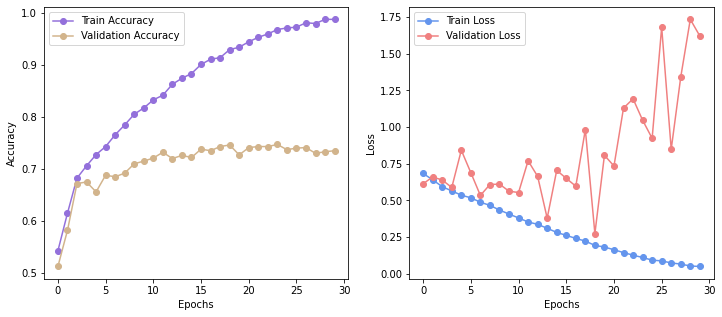

In [ ]:
import matplotlib.pyplot as plt, numpy as np

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = 30

fig, [ax1, ax2] = plt.subplots(figsize=(12,5), ncols=2)

ax1.plot(np.arange(epoch), acc, color='mediumpurple', marker='o', label='Train Accuracy')
ax1.plot(np.arange(epoch), val_acc, color='tan', marker='o', label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(np.arange(epoch), loss, color='cornflowerblue', marker='o', label='Train Loss')
ax2.plot(np.arange(epoch), val_loss, color='lightcoral', marker='o', label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()